In [23]:
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
import numpy as np
import matplotlib
import os

import torch

In [24]:
INPUT_LENGTH = 64

class ReLU(torch.nn.Module): 
    def __init__(self): 
        super(ReLU, self).__init__()
        self.bias = torch.nn.Parameter(torch.zeros(INPUT_LENGTH,), requires_grad=False)
          
    def forward(self, x): 
        return torch.nn.functional.relu(x)

class ULeR(torch.nn.Module): 
    def __init__(self): 
        super(ULeR, self).__init__()
        self.bias = torch.nn.Parameter(torch.zeros(INPUT_LENGTH,), requires_grad=False)
          
    def forward(self, x): 
        return torch.nn.functional.relu(-1*x)

class LURe(torch.nn.Module): 
    def __init__(self): 
        super(LURe, self).__init__()
        self.bias = torch.nn.Parameter(torch.zeros(INPUT_LENGTH,), requires_grad=False)
          
    def forward(self, x): 
        return -1*torch.nn.functional.relu(x)

class eRUL(torch.nn.Module): 
    def __init__(self): 
        super(eRUL, self).__init__()
        self.bias = torch.nn.Parameter(torch.zeros(INPUT_LENGTH,), requires_grad=False)
          
    def forward(self, x): 
        return -1*torch.nn.functional.relu(-1*x)

class ULLU(torch.nn.Module): 
    def __init__(self): 
        super(ULLU, self).__init__()
        self.bias = torch.nn.Parameter(torch.zeros(INPUT_LENGTH,), requires_grad=False)
          
    def forward(self, x):
        return torch.abs(x)

class LUUL(torch.nn.Module): 
    def __init__(self): 
        super(LUUL, self).__init__()
        self.bias = torch.nn.Parameter(torch.zeros(INPUT_LENGTH,), requires_grad=False)
          
    def forward(self, x): 
        return -1*torch.abs(x)

class ULUL(torch.nn.Module): 
    def __init__(self): 
        super(ULUL, self).__init__()
        self.bias = torch.nn.Parameter(torch.zeros(INPUT_LENGTH,), requires_grad=False)
          
    def forward(self, x): 
        return -1*x

class LULU(torch.nn.Module): 
    def __init__(self): 
        super(LULU, self).__init__()
        self.bias = torch.nn.Parameter(torch.zeros(INPUT_LENGTH,), requires_grad=False)
          
    def forward(self, x): 
        return x
        


class NeuralNetwork(torch.nn.Module):
    def __init__(self):
        super().__init__()

        # Positive
        self.lin_p1 = torch.nn.Linear(INPUT_LENGTH, INPUT_LENGTH, bias=False)
        self.lin_p2 = torch.nn.Linear(INPUT_LENGTH, INPUT_LENGTH, bias=False)
        self.lin_p3 = torch.nn.Linear(INPUT_LENGTH, INPUT_LENGTH, bias=False)
        self.lin_p4 = torch.nn.Linear(INPUT_LENGTH, INPUT_LENGTH, bias=False)
        self.lin_p5 = torch.nn.Linear(INPUT_LENGTH, INPUT_LENGTH, bias=False)
        self.lin_p6 = torch.nn.Linear(INPUT_LENGTH, INPUT_LENGTH, bias=False)

        self.p_11 = LUUL()
        self.p_12 = LURe()
        self.p_21 = LUUL()
        self.p_22 = ULeR()
        self.p_31 = ULLU()
        self.p_32 = ReLU()
        self.p_41 = LURe()
        self.p_42 = ReLU()
        self.p_51 = ULLU()
        self.p_52 = eRUL()
        self.p_61 = ULLU()
        self.p_62 = ULeR()

        # Negative
        self.lin_n1 = torch.nn.Linear(INPUT_LENGTH, INPUT_LENGTH, bias=False)
        self.lin_n2 = torch.nn.Linear(INPUT_LENGTH, INPUT_LENGTH, bias=False)
        self.lin_n3 = torch.nn.Linear(INPUT_LENGTH, INPUT_LENGTH, bias=False)
        self.lin_n4 = torch.nn.Linear(INPUT_LENGTH, INPUT_LENGTH, bias=False)
        self.lin_n5 = torch.nn.Linear(INPUT_LENGTH, INPUT_LENGTH, bias=False)
        self.lin_n6 = torch.nn.Linear(INPUT_LENGTH, INPUT_LENGTH, bias=False)

        self.n_11 = LUUL()
        self.n_12 = ReLU()
        self.n_21 = eRUL()
        self.n_22 = ULeR()
        self.n_31 = ULeR()
        self.n_32 = eRUL()
        self.n_41 = LUUL()
        self.n_42 = LURe()
        self.n_51 = eRUL()   
        self.n_52 = eRUL()
        self.n_61 = ULeR()
        self.n_62 = ReLU()


    def forward(self, x):
        p1 = self.p_12(self.lin_p1(self.p_11(x)))
        p2 = self.p_22(self.lin_p2(self.p_21(x)))
        p3 = self.p_32(self.lin_p3(self.p_31(x)))
        p4 = self.p_42(self.lin_p4(self.p_41(x)))
        p5 = self.p_52(self.lin_p5(self.p_51(x)))
        p6 = self.p_62(self.lin_p6(self.p_61(x)))

        p_out = torch.sum(torch.stack([p1, p2, p3, p4, p5, p6]), dim=0)
        
        n1 = self.n_12(self.lin_n1(self.n_11(x)))
        n2 = self.n_22(self.lin_n2(self.n_21(x)))
        n3 = self.n_32(self.lin_n3(self.n_31(x)))
        n4 = self.n_42(self.lin_n4(self.n_41(x)))
        n5 = self.n_52(self.lin_n5(self.n_51(x)))
        n6 = self.n_62(self.lin_n6(self.n_61(x)))

        n_out = torch.sum(torch.stack([n1, n2, n3, n4, n5, n6]), dim=0)
                
        y = torch.add(p_out, n_out)
        
        return y

In [25]:
model = NeuralNetwork()
print(model)

NeuralNetwork(
  (lin_p1): Linear(in_features=64, out_features=64, bias=False)
  (lin_p2): Linear(in_features=64, out_features=64, bias=False)
  (lin_p3): Linear(in_features=64, out_features=64, bias=False)
  (lin_p4): Linear(in_features=64, out_features=64, bias=False)
  (lin_p5): Linear(in_features=64, out_features=64, bias=False)
  (lin_p6): Linear(in_features=64, out_features=64, bias=False)
  (p_11): LUUL()
  (p_12): LURe()
  (p_21): LUUL()
  (p_22): ULeR()
  (p_31): ULLU()
  (p_32): ReLU()
  (p_41): LURe()
  (p_42): ReLU()
  (p_51): ULLU()
  (p_52): eRUL()
  (p_61): ULLU()
  (p_62): ULeR()
  (lin_n1): Linear(in_features=64, out_features=64, bias=False)
  (lin_n2): Linear(in_features=64, out_features=64, bias=False)
  (lin_n3): Linear(in_features=64, out_features=64, bias=False)
  (lin_n4): Linear(in_features=64, out_features=64, bias=False)
  (lin_n5): Linear(in_features=64, out_features=64, bias=False)
  (lin_n6): Linear(in_features=64, out_features=64, bias=False)
  (n_11): LUU

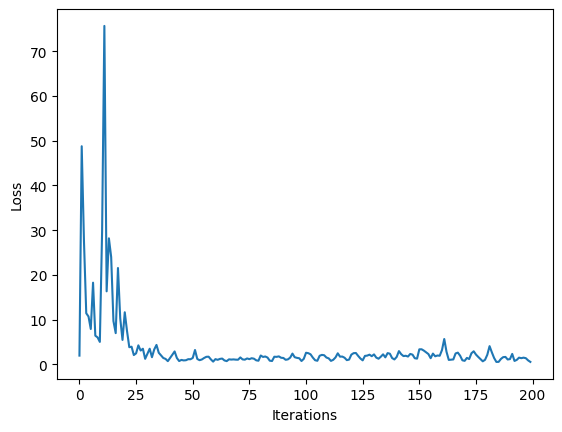

In [26]:
# for param in model.parameters():
#     print(param.data)

loss_function = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-1, weight_decay = 0)


inputs = torch.randint(-1, 2, (10, INPUT_LENGTH), dtype=torch.float32)

epochs = 20
outputs = []
losses = []

for epoch in range(epochs):
    for input in inputs:
        reconstructed = model(input)
        loss = loss_function(reconstructed, -1*input)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        losses.append(loss.item())
        outputs.append((epochs, input, reconstructed))

    # print(reconstructed)
    
plt.xlabel('Iterations')
plt.ylabel('Loss')

plt.plot(losses)

# for param in model.parameters():
#     print(param.data)


## Solution

Setting linear to -1*Id matrix gives solution

In [27]:
model.lin_p1.weight = torch.nn.Parameter(-1*torch.eye(INPUT_LENGTH,INPUT_LENGTH), requires_grad=False)
model.lin_p2.weight = torch.nn.Parameter(1*torch.eye(INPUT_LENGTH,INPUT_LENGTH), requires_grad=False)
model.lin_p3.weight = torch.nn.Parameter(1*torch.eye(INPUT_LENGTH,INPUT_LENGTH), requires_grad=False)
model.lin_p4.weight = torch.nn.Parameter(-1*torch.eye(INPUT_LENGTH,INPUT_LENGTH), requires_grad=False)
model.lin_p5.weight = torch.nn.Parameter(-1*torch.eye(INPUT_LENGTH,INPUT_LENGTH), requires_grad=False)
model.lin_p6.weight = torch.nn.Parameter(1*torch.eye(INPUT_LENGTH,INPUT_LENGTH), requires_grad=False)

model.lin_n1.weight = torch.nn.Parameter(-1*torch.eye(INPUT_LENGTH,INPUT_LENGTH), requires_grad=False)
model.lin_n2.weight = torch.nn.Parameter(1*torch.eye(INPUT_LENGTH,INPUT_LENGTH), requires_grad=False)
model.lin_n3.weight = torch.nn.Parameter(-1*torch.eye(INPUT_LENGTH,INPUT_LENGTH), requires_grad=False)
model.lin_n4.weight = torch.nn.Parameter(-1*torch.eye(INPUT_LENGTH,INPUT_LENGTH), requires_grad=False)
model.lin_n5.weight = torch.nn.Parameter(1*torch.eye(INPUT_LENGTH,INPUT_LENGTH), requires_grad=False)
model.lin_n6.weight = torch.nn.Parameter(-1*torch.eye(INPUT_LENGTH,INPUT_LENGTH), requires_grad=False)

tensor([ 2.,  2.,  0.,  3., -3.,  2.,  0., -3.,  2., -2.,  0.,  0.,  2., -1.,
        -3., -2., -3.,  0.,  3., -1., -1.,  2.,  3.,  1.,  0.,  1.,  0., -2.,
         2., -2.,  2.,  0.,  1., -1., -3.,  2., -1.,  1., -3.,  2.,  0., -3.,
        -1., -1.,  1.,  0., -3.,  3.,  0.,  0., -2.,  1., -3.,  2.,  2.,  2.,
        -2.,  2.,  0.,  1.,  2.,  0.,  0.,  0.])
tensor([ 2.,  2.,  0.,  3., -3.,  2.,  0., -3.,  2., -2.,  0.,  0.,  2., -1.,
        -3., -2., -3.,  0.,  3., -1., -1.,  2.,  3.,  1.,  0.,  1.,  0., -2.,
         2., -2.,  2.,  0.,  1., -1., -3.,  2., -1.,  1., -3.,  2.,  0., -3.,
        -1., -1.,  1.,  0., -3.,  3.,  0.,  0., -2.,  1., -3.,  2.,  2.,  2.,
        -2.,  2.,  0.,  1.,  2.,  0.,  0.,  0.])
tensor([-3., -3.,  2., -1.,  1., -1.,  1., -2.,  2., -3., -2.,  3.,  1., -1.,
         2., -1., -2.,  1.,  2.,  1., -2.,  2., -2.,  3.,  3.,  3., -3.,  1.,
         1.,  3., -3.,  3.,  1.,  1., -1., -2., -1., -2.,  0.,  1.,  3.,  0.,
         3.,  0.,  1.,  1.,  3., -3., -2., -

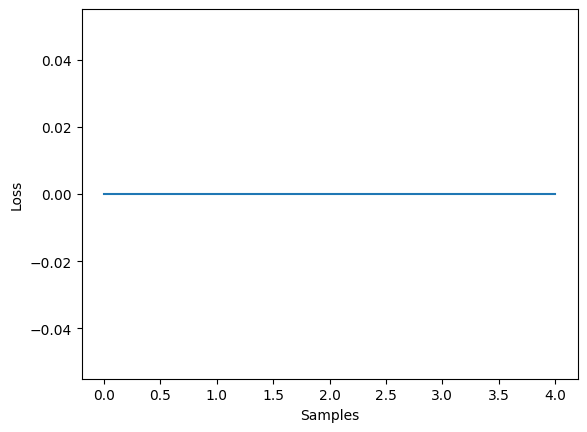

In [28]:
inputs = torch.randint(-3, 4, (5, INPUT_LENGTH), dtype=torch.float32)

losses = []

model.eval()
with torch.no_grad():
    for input in inputs:
        reconstructed = model(input)
        loss = loss_function(reconstructed, input)
        
        losses.append(loss.item())

        print(input)
        print(reconstructed)
    
plt.xlabel('Samples')
plt.ylabel('Loss')

plt.plot(losses)

In [29]:
torch.save(model.state_dict(), 'solve_weights.pth')

## Example of wrong solutions

In [31]:
model.lin_p1.weight = torch.nn.Parameter(-1*torch.eye(INPUT_LENGTH,INPUT_LENGTH), requires_grad=False)
model.lin_p2.weight = torch.nn.Parameter(-1*torch.eye(INPUT_LENGTH,INPUT_LENGTH), requires_grad=False)
model.lin_p3.weight = torch.nn.Parameter(-1*torch.eye(INPUT_LENGTH,INPUT_LENGTH), requires_grad=False)
model.lin_p4.weight = torch.nn.Parameter(1*torch.eye(INPUT_LENGTH,INPUT_LENGTH), requires_grad=False)
model.lin_p5.weight = torch.nn.Parameter(-1*torch.eye(INPUT_LENGTH,INPUT_LENGTH), requires_grad=False)
model.lin_p6.weight = torch.nn.Parameter(1*torch.eye(INPUT_LENGTH,INPUT_LENGTH), requires_grad=False)

model.lin_n1.weight = torch.nn.Parameter(1*torch.eye(INPUT_LENGTH,INPUT_LENGTH), requires_grad=False)
model.lin_n2.weight = torch.nn.Parameter(1*torch.eye(INPUT_LENGTH,INPUT_LENGTH), requires_grad=False)
model.lin_n3.weight = torch.nn.Parameter(1*torch.eye(INPUT_LENGTH,INPUT_LENGTH), requires_grad=False)
model.lin_n4.weight = torch.nn.Parameter(-1*torch.eye(INPUT_LENGTH,INPUT_LENGTH), requires_grad=False)
model.lin_n5.weight = torch.nn.Parameter(1*torch.eye(INPUT_LENGTH,INPUT_LENGTH), requires_grad=False)
model.lin_n6.weight = torch.nn.Parameter(-1*torch.eye(INPUT_LENGTH,INPUT_LENGTH), requires_grad=False)

In [32]:
torch.save(model.state_dict(), 'wrong_weights.pth')

## Random weight

In [34]:
model.lin_p1.weight = torch.nn.Parameter(torch.rand(INPUT_LENGTH,INPUT_LENGTH), requires_grad=False)
model.lin_p2.weight = torch.nn.Parameter(torch.rand(INPUT_LENGTH,INPUT_LENGTH), requires_grad=False)
model.lin_p3.weight = torch.nn.Parameter(torch.rand(INPUT_LENGTH,INPUT_LENGTH), requires_grad=False)
model.lin_p4.weight = torch.nn.Parameter(torch.rand(INPUT_LENGTH,INPUT_LENGTH), requires_grad=False)
model.lin_p5.weight = torch.nn.Parameter(torch.rand(INPUT_LENGTH,INPUT_LENGTH), requires_grad=False)
model.lin_p6.weight = torch.nn.Parameter(torch.rand(INPUT_LENGTH,INPUT_LENGTH), requires_grad=False)

model.lin_n1.weight = torch.nn.Parameter(torch.rand(INPUT_LENGTH,INPUT_LENGTH), requires_grad=False)
model.lin_n2.weight = torch.nn.Parameter(torch.rand(INPUT_LENGTH,INPUT_LENGTH), requires_grad=False)
model.lin_n3.weight = torch.nn.Parameter(torch.rand(INPUT_LENGTH,INPUT_LENGTH), requires_grad=False)
model.lin_n4.weight = torch.nn.Parameter(torch.rand(INPUT_LENGTH,INPUT_LENGTH), requires_grad=False)
model.lin_n5.weight = torch.nn.Parameter(torch.rand(INPUT_LENGTH,INPUT_LENGTH), requires_grad=False)
model.lin_n6.weight = torch.nn.Parameter(torch.rand(INPUT_LENGTH,INPUT_LENGTH), requires_grad=False)

In [35]:
torch.save(model.state_dict(), 'rand_weights.pth')